<a href="https://colab.research.google.com/github/Tanishqa-10/NNDL-LAB/blob/main/RNN_LSTM_(milk_production_prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RNN Model using LSTM to prediction milk production.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/monthly-milk-production-pounds.csv',index_col='Month',parse_dates=True)

In [6]:
#Displaying month wise production data
df.index.freq='MS'

In [7]:
df.head() 

,Monthly milk production (pounds per cow)
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


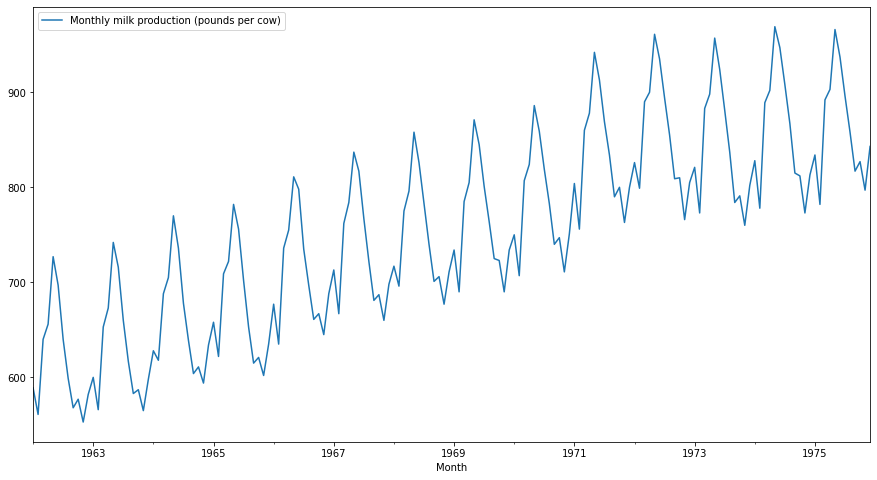

In [42]:
#Displaying Data in Plot format
df.plot(figsize=(15,8))

In [9]:
#provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
#will show seperate graph for trend of production, seasonal changes observered and overall obseravation(same as above graph)
#The residual graph shows Overall - trend - seasonal, we can call it as noise and cannot we determined.
results = seasonal_decompose(df['Monthly milk production (pounds per cow)'])

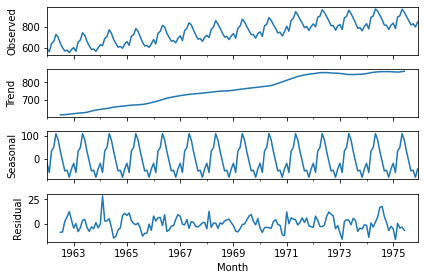

In [13]:
results.plot();

In [14]:
len(df)

168

In [15]:
train = df.iloc[:156]        # all data except the last 12 months data 168-12=156 to train the model.
test = df.iloc[156:]         # Last 12 months data used as testing set.

Using MinMaxScaler to convert all the data in the range of 0 to 1, this helps to reduce complexity of the raw data.

In [16]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [17]:
#magnitude of the production values not in proper range
df.head(),df.tail()

(            Monthly milk production (pounds per cow)
 Month                                               
 1962-01-01                                       589
 1962-02-01                                       561
 1962-03-01                                       640
 1962-04-01                                       656
 1962-05-01                                       727,
             Monthly milk production (pounds per cow)
 Month                                               
 1975-08-01                                       858
 1975-09-01                                       817
 1975-10-01                                       827
 1975-11-01                                       797
 1975-12-01                                       843)

In [18]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [19]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

Using Supervised learning to predict new input

---


example:     input- [1,2,3]   prediction- [4]

---


new input- [2,3,4]   prediction- [5]

---


new input- [3,4,5]  and the loop continues

In [20]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [22]:
#predicting 4th output using first three inputs
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [43]:
#predicting 4th output using first three inputs
X,y = generator[1]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.01923077 0.20913462 0.24759615 0.41826923 0.34615385 0.20913462
 0.11057692 0.03605769 0.05769231 0.         0.06971154 0.11298077]
Predict this y: 
 [[0.03125]]


In [23]:
# 1 row 3 columns and 1 feature
X.shape        

(1, 3, 1)

In [24]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [26]:
# define model
model = Sequential()   #layers are in sequence i.e one after the another
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))   #100 neurons and ReLU activation function 
model.add(Dense(1))    #output layer
model.compile(optimizer='adam', loss='mse')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [28]:
# fit model
model.fit(generator,epochs=50)  #generator creates batches of 3-3 inputs and using that predict the next value

Epoch 1/50
144/144 [==============================] - 2s 5ms/step - loss: 0.0630
Epoch 2/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0241
Epoch 3/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0180
Epoch 4/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0132
Epoch 5/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0216
Epoch 6/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0120
Epoch 7/50
144/144 [==============================] - 1s 9ms/step - loss: 0.0106
Epoch 8/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0069
Epoch 9/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0062
Epoch 10/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0048
Epoch 11/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0039
Epoch 12/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0046
Epoch 13/50
144/144 [====

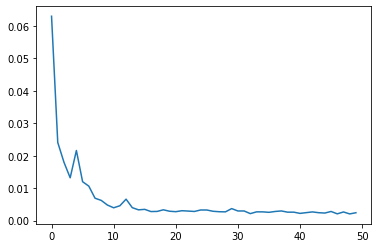

In [29]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
#we can obsreve the decrease in loss fro the graph over 50 epoch

In [30]:
#taking last 12 months values in training set to make prediction for 1st value in test set
last_train_batch = scaled_train[-12:] 

In [31]:
#reshaping data in 1, 3, 1 i.e 1, no. of input, no. of features
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [44]:
model.predict(last_train_batch)

array([[0.61636984]], dtype=float32)

In [33]:
scaled_test[0]     #original- 0.61  predicted- 0.67  difference is negligible

array([0.67548077])

In [34]:
#empty list of test predictions
test_predictions = []     
first_eval_batch = scaled_train[-n_input:]      #last 12 values from the training set
current_batch = first_eval_batch.reshape((1, n_input, n_features))   #reshaping this last 12 values

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [35]:
test_predictions

[array([0.61636984], dtype=float32),
 array([0.58588815], dtype=float32),
 array([0.7338743], dtype=float32),
 array([0.7829838], dtype=float32),
 array([0.8716145], dtype=float32),
 array([0.8647631], dtype=float32),
 array([0.8162604], dtype=float32),
 array([0.7406502], dtype=float32),
 array([0.64399195], dtype=float32),
 array([0.60354996], dtype=float32),
 array([0.5452386], dtype=float32),
 array([0.5824875], dtype=float32)]

In [36]:
#changing back to original scale.
test.head()

,Monthly milk production (pounds per cow)
Month,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [37]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


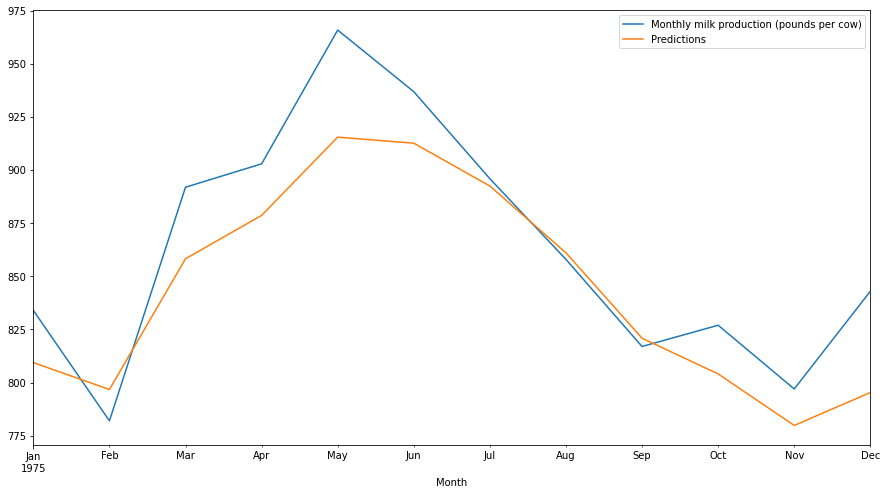

In [45]:
#Developed model is not 100% accurate, but is quite close 
test.plot(figsize=(15,8))

In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Monthly milk production (pounds per cow)'],test['Predictions']))
print(rmse)
#displays root mean square error.

27.092498819727197
